In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tp
from tensorflow import keras

In [2]:
D=pd.read_csv(r"C:\Users\RAHUL PATIL\Downloads\smart_home_device_usage_data.csv")
D

,UserID,DeviceType,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
0,1,Smart Speaker,15.307188,1.961607,1,4,36,1
1,2,Camera,19.973343,8.610689,1,0,29,1
2,3,Security System,18.911535,2.651777,1,0,20,1
3,4,Camera,7.011127,2.341653,0,3,15,0
4,5,Camera,22.610684,4.859069,1,3,36,1
...,...,...,...,...,...,...,...,...
5398,5399,Thermostat,4.556314,5.871764,1,0,28,0
5399,5400,Lights,0.561856,1.555992,1,4,24,0
5400,5401,Smart Speaker,11.096236,7.677779,0,0,42,0
5401,5402,Security System,8.782169,7.467929,0,2,28,1


In [3]:
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5403 entries, 0 to 5402
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   UserID                5403 non-null   int64  
 1   DeviceType            5403 non-null   object 
 2   UsageHoursPerDay      5403 non-null   float64
 3   EnergyConsumption     5403 non-null   float64
 4   UserPreferences       5403 non-null   int64  
 5   MalfunctionIncidents  5403 non-null   int64  
 6   DeviceAgeMonths       5403 non-null   int64  
 7   SmartHomeEfficiency   5403 non-null   int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 337.8+ KB


In [4]:
D.isna().sum()

UserID                  0
DeviceType              0
UsageHoursPerDay        0
EnergyConsumption       0
UserPreferences         0
MalfunctionIncidents    0
DeviceAgeMonths         0
SmartHomeEfficiency     0
dtype: int64

In [5]:
D.describe()

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths,SmartHomeEfficiency
count,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000,5403.000000
mean,2702.000000,12.052992,5.054302,0.511753,2.066445,30.312234,0.376643
std,1559.856083,6.714961,2.878941,0.499908,1.423291,16.990525,0.484589
min,1.000000,0.501241,0.101562,0.000000,0.000000,1.000000,0.000000
25%,1351.500000,6.297871,2.524968,0.000000,1.000000,15.000000,0.000000
50%,2702.000000,11.903768,5.007047,1.000000,2.000000,30.000000,0.000000
75%,4052.500000,17.791751,7.611912,1.000000,3.000000,45.000000,1.000000
max,5403.000000,23.987326,9.998071,1.000000,4.000000,59.000000,1.000000


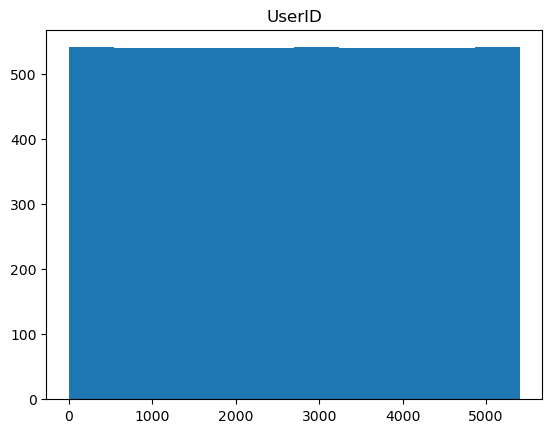

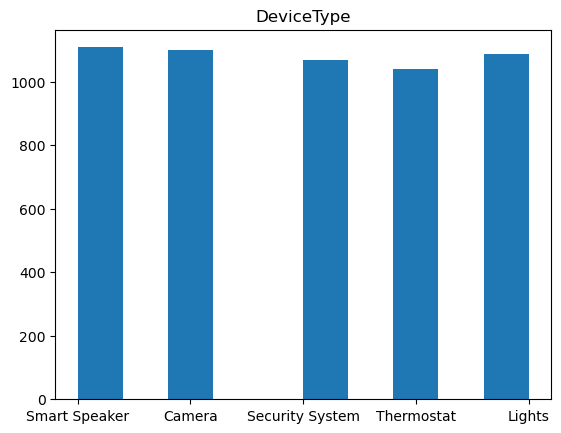

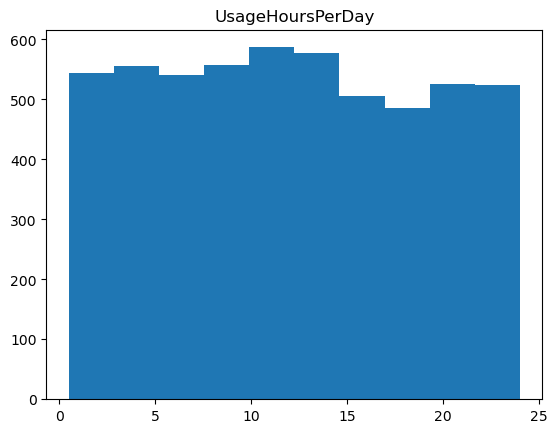

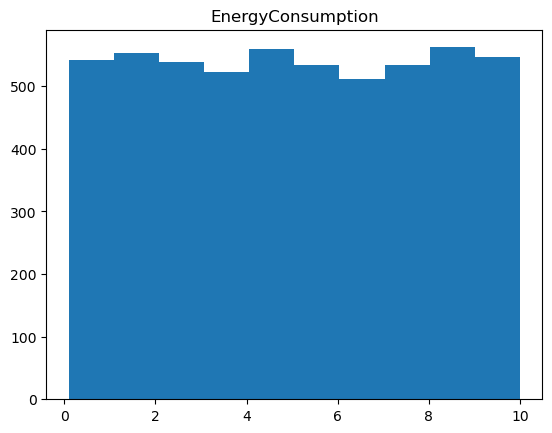

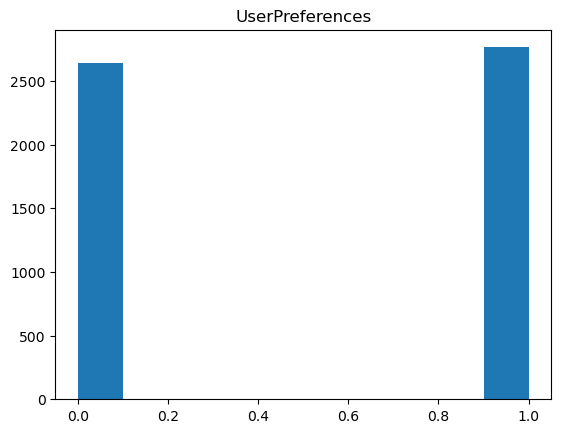

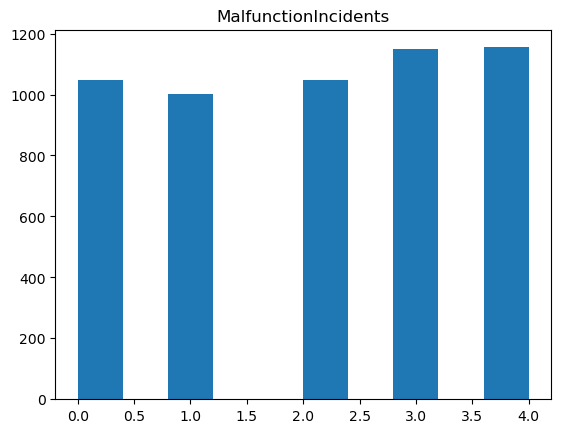

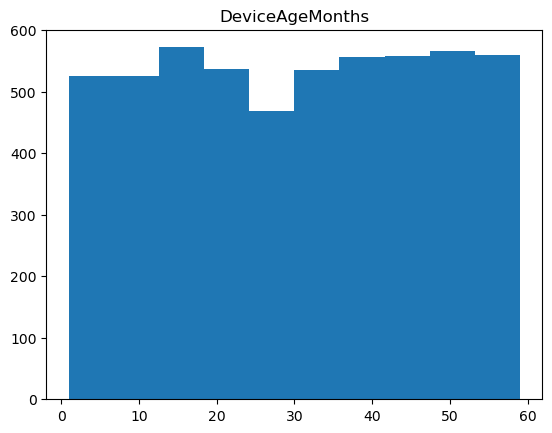

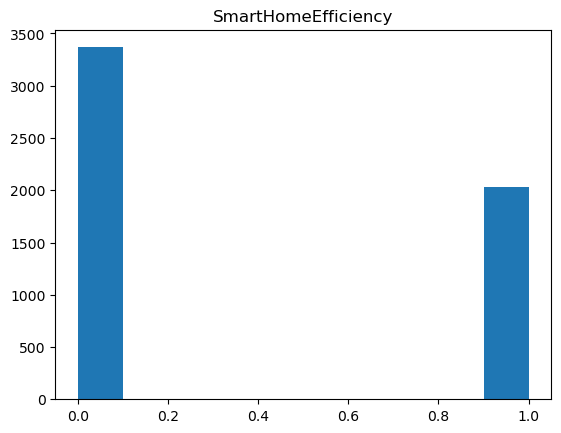

In [6]:
for i in D.columns:
    plt.hist(D[i])
    plt.title(i)
    plt.show()

<Axes: >

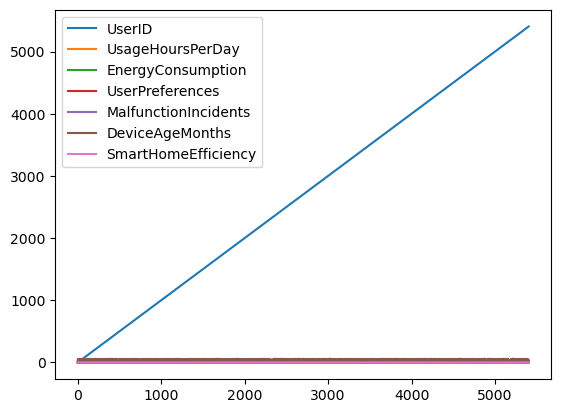

In [7]:
D.plot()

In [8]:
F=D.drop(['SmartHomeEfficiency','DeviceType'],axis=1)
T=D[['SmartHomeEfficiency']]

In [9]:
F

,UserID,UsageHoursPerDay,EnergyConsumption,UserPreferences,MalfunctionIncidents,DeviceAgeMonths
0,1,15.307188,1.961607,1,4,36
1,2,19.973343,8.610689,1,0,29
2,3,18.911535,2.651777,1,0,20
3,4,7.011127,2.341653,0,3,15
4,5,22.610684,4.859069,1,3,36
...,...,...,...,...,...,...
5398,5399,4.556314,5.871764,1,0,28
5399,5400,0.561856,1.555992,1,4,24
5400,5401,11.096236,7.677779,0,0,42
5401,5402,8.782169,7.467929,0,2,28


In [10]:
T

,SmartHomeEfficiency
0,1
1,1
2,1
3,0
4,1
...,...
5398,0
5399,0
5400,0
5401,1


In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(F,T,train_size=0.80,random_state=40)

In [12]:
from sklearn.preprocessing import MinMaxScaler 
M=MinMaxScaler()

In [13]:
x_train=M.fit_transform(x_train) 
x_test=M.transform(x_test)

In [55]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(6,),activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(20,activation='relu'),
    keras.layers.Dropout(0.1),
    keras.layers.Dense(18,activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['accuracy'])


In [58]:
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9120 - loss: 0.1896
Epoch 2/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9105 - loss: 0.1994
Epoch 3/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9148 - loss: 0.1953
Epoch 4/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9102 - loss: 0.1961
Epoch 5/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9145 - loss: 0.1935
Epoch 6/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9203 - loss: 0.1880
Epoch 7/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9224 - loss: 0.1823
Epoch 8/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9196 - loss: 0.1918
Epoch 9/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9103 - loss: 0.2033
Epoch 10/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9062 - loss: 0.2000
Epoch 11/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9126 - loss: 0.1942
Epoch 12/50
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [60]:
T=model.predict(x_test)
T

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


array([[3.1335770e-05],
       [9.7390181e-01],
       [8.3518338e-01],
       ...,
       [9.3333637e-03],
       [8.2228305e-03],
       [5.7381725e-01]], dtype=float32)

In [61]:
pred=[]
for i in T:
    if i>0.5:
        pred.append(1)
    else:
        pred.append(0)
    

In [62]:
pred

[0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,


In [63]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
accuracy_score(y_test,pred)

0.9222941720629048

In [64]:
confusion_matrix(y_test,pred)

array([[614,  37],
       [ 47, 383]], dtype=int64)

In [65]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       651
           1       0.91      0.89      0.90       430

    accuracy                           0.92      1081
   macro avg       0.92      0.92      0.92      1081
weighted avg       0.92      0.92      0.92      1081



In [66]:
model.evaluate(x_train,y_train)

136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9363 - loss: 0.1257


[0.12402624636888504, 0.9398426413536072]

In [67]:
model.evaluate(x_test,y_test)

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9127 - loss: 0.1814


[0.16248354315757751, 0.9222941994667053]

In [68]:
from sklearn.linear_model import LogisticRegression
L=LogisticRegression()
L.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [69]:
L1=L.score(x_train,y_train)*100
L1

87.4595094863489

In [70]:
L2=L.score(x_test,y_test)*100
L2

87.32654949121184

In [71]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB,ComplementNB
G=GaussianNB()
M=MultinomialNB()
B=BernoulliNB()
C=ComplementNB()

In [72]:
G.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [73]:
G1=G.score(x_train,y_train)*100
G1

83.15594632114761

In [74]:
G2=G.score(x_test,y_test)*100
G2

84.45883441258094

In [75]:
B.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [76]:
B1=B.score(x_train,y_train)*100
B1

79.01434521055067

In [77]:
B2=B.score(x_test,y_test)*100
B2

79.92599444958371

In [78]:
M.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

In [79]:
M1=M.score(x_train,y_train)*100
M1

79.10689495603887

In [80]:
M2=M.score(x_test,y_test)*100
M2

80.57354301572617

In [81]:
C.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ComplementNB()

In [82]:
C1=C.score(x_train,y_train)*100
C1

79.17630726515502

In [83]:
C2=C.score(x_test,y_test)*100
C2

80.11100832562443

In [84]:
from sklearn.svm import SVC
S=SVC()

In [85]:
S.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC()

In [86]:
S1=S.score(x_train,y_train)*100
S1

92.01758445164275

In [87]:
S2=S.score(x_test,y_test)*100
S2

91.2118408880666

In [88]:
from sklearn.neighbors import KNeighborsClassifier
K=KNeighborsClassifier()

In [89]:
K.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [90]:
K1=K.score(x_train,y_train)*100
K1

94.28505321610365

In [91]:
K2=K.score(x_test,y_test)*100
K2

91.85938945420907

In [92]:
from sklearn.tree import DecisionTreeClassifier
D=DecisionTreeClassifier()

In [93]:
D.fit(x_train,y_train)

DecisionTreeClassifier()

In [94]:
D1=D.score(x_train,y_train)*100
D1

100.0

In [95]:
D2=D.score(x_test,y_test)*100
D2

95.28214616096207

In [96]:
from sklearn.ensemble import RandomForestClassifier
f=RandomForestClassifier()
f.fit(x_train,y_train)

C:\Users\RAHUL PATIL\AppData\Local\Temp\ipykernel_19904\4187778240.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  f.fit(x_train,y_train)


RandomForestClassifier()

In [97]:
F1=f.score(x_train,y_train)*100
F1

100.0

In [98]:
F2=f.score(x_test,y_test)*100
F2

95.28214616096207

In [99]:
from sklearn.ensemble import AdaBoostClassifier
A=AdaBoostClassifier()

In [100]:
A.fit(x_train,y_train)

C:\Users\RAHUL PATIL\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier()

In [101]:
A1=A.score(x_train,y_train)*100
A1

94.09995372512726

In [102]:
A2=A.score(x_test,y_test)*100
A2

94.17206290471786

In [103]:
import numpy as np

In [104]:
AC={'Models':['LOGISTIC REGRESSION','SVC','GaussianNB','BernoulliNB','ComplementNB','MultinomialNB','K Nearest Neighbor','Decision Tree','AdaBoostClassifier','RandomForest'],'Train Accuracy':[L1,S1,G1,B1,C1,M1,K1,D1,A1,F1],'Test Accuracy':[L2,S2,G2,B2,C2,M2,K2,D2,A2,F2]}
AC=pd.DataFrame(AC)
AC=np.around(AC,2)
AC

,Models,Train Accuracy,Test Accuracy
0,LOGISTIC REGRESSION,87.46,87.33
1,SVC,92.02,91.21
2,GaussianNB,83.16,84.46
3,BernoulliNB,79.01,79.93
4,ComplementNB,79.18,80.11
5,MultinomialNB,79.11,80.57
6,K Nearest Neighbor,94.29,91.86
7,Decision Tree,100.00,95.28
8,AdaBoostClassifier,94.10,94.17
9,RandomForest,100.00,95.28


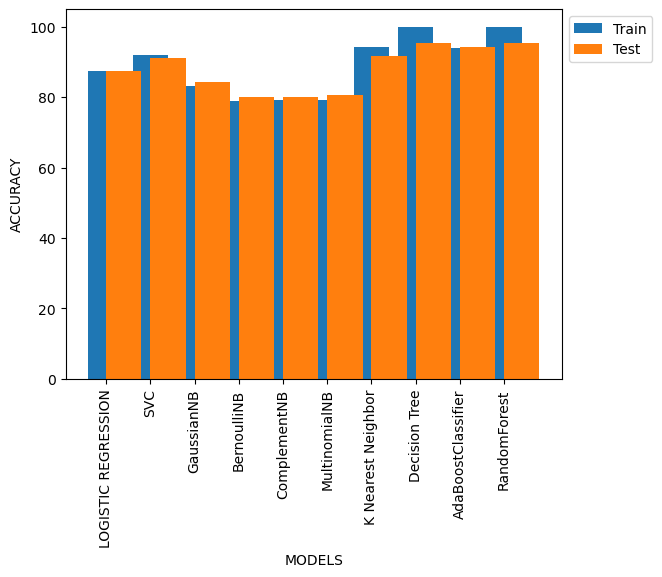

In [105]:
plt.bar(AC['Models'],AC['Train Accuracy'],label='Train')
plt.bar(AC['Models'],AC['Test Accuracy'],align='edge',label='Test')
plt.legend(bbox_to_anchor=[1,0,0,1])
plt.xlabel('MODELS')
plt.ylabel('ACCURACY')
plt.xticks(rotation=90)
plt.show()
